# JUAS tracker

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import m_p, c, e

In [2]:
Ekin = 26e9  # eV
charge = 1
E0 = m_p * c**2. / e
circumference = 6911.5  # m
energy = Ekin + E0
momentum = np.sqrt(energy**2. - E0**2.)
beta = momentum / energy
gamma = energy / E0
t_rev = circumference / (beta * c)
f_rev = 1 / t_rev
harmonic = 4620
voltage = 4.5e6  # V
f_rf = harmonic * f_rev
t_rf = 1 / f_rf
gamma_t = 18
alpha_c = 1 / gamma_t**2.
eta = alpha_c - 1 / gamma**2.

In [3]:
print("Beta: " +
      str(beta))
print("Gamma: " +
      str(gamma))
print("Revolution period: " +
      str(t_rev * 1e6) + " mus")
print("RF frequency: " +
      str(f_rf / 1e6) + " MHz")
print("RF period: " +
      str(t_rf * 1e9) + " ns")
print("Momentum compaction factor: " +
      str(alpha_c))
print("Phase slippage factor: " +
      str(eta))

Beta: 0.9993932358608412
Gamma: 28.710512044511262
Revolution period: 23.0682794443392 mus
RF frequency: 200.27501449110963 MHz
RF period: 4.993134078861298 ns
Momentum compaction factor: 0.0030864197530864196
Phase slippage factor: 0.0018732596374893458


In [4]:
def drift(dE, harmonic, eta, beta, energy):

    return 2 * np.pi * harmonic * \
        eta * dE / (beta**2 * energy)


def rf_kick(phi, charge, voltage, phi_s=0):

    return charge * voltage * (
        np.sin(phi) - np.sin(phi_s))


In [5]:
n_particles = 10  # or millions ? :)
phase_coordinates = np.linspace(
    0, 2 * np.pi, n_particles)
dE_coordinates = np.zeros(n_particles)

n_turns = 25  # or millions? :)

In [6]:
saved_positions_phi = np.zeros((n_particles, n_turns))
saved_positions_dE = np.zeros((n_particles, n_turns))

for idx_turn in range(n_turns):
    dE_coordinates += rf_kick(
        phase_coordinates, charge, voltage)

    phase_coordinates += drift(
        dE_coordinates, harmonic, eta, beta, energy)

    saved_positions_dE[:, idx_turn] = dE_coordinates
    saved_positions_phi[:, idx_turn] = phase_coordinates

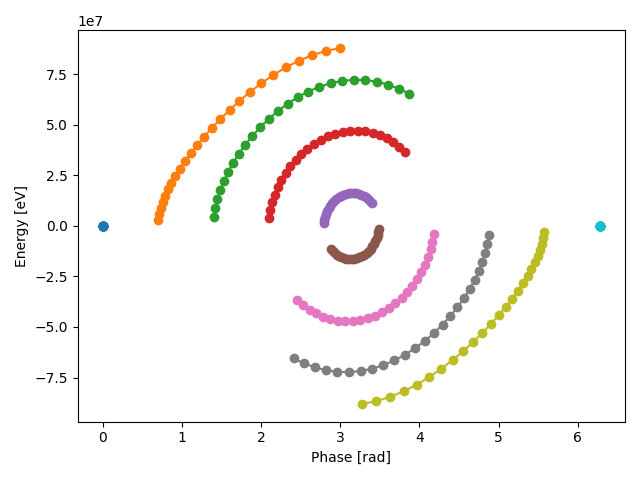

In [7]:
plt.figure('phase space')
plt.clf()
for idx_particle in range(n_particles):
    plt.plot(
        saved_positions_phi[idx_particle, :],
        saved_positions_dE[idx_particle, :],
        '-o')
plt.xlabel('Phase [rad]')
plt.ylabel('Energy [eV]')
plt.tight_layout()
plt.savefig('simple_tracker.svg')
plt.show()